# Problem Statement :
To predict the CO2 emissions (g/km) from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle.

# Dataset :
The dataset has been taken from the Canada Government official website link is given below.
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6
This dataset contains official CO2 emissions data for various car of different features over the period of 2014 to 2020. It has 7385 samples and total 11 features.
there are few abbreviations that has been used in this data for different features. The abbreviations are listed below :
### **1. Model :**
**4WD/4X4** = Four-wheel drive  
**AWD** = All-wheel drive  
**FFV** = Flexible-fuel vehicle  
**SWB** = Short wheelbase  
**LWB** = Long wheelbase  
**EWB** = Extended wheelbase  
### **2. Transmission :**
**A** = automatic  
**AM** = automated manual  
**AS** = automatic with select shift  
**AV** = continuously variable  
**M** = manual  
### **3. Fuel type :**
**X** = regular gasoline  
**Z** = premium gasoline  
**D** = diesel  
**E** = ethanol (E85)  
**N** = natural gas  
### **4. Fuel consumption :**
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

# **EXPLORATORY DATA ANALYSIS (EDA)**
## **Objective of EDA :**
#### 1. To check for missing data and other anamolies.
#### 2. To gain maximum insight into the data set and its underlying structure.
#### 3. To check the distribution of the data.
#### 4. Identify the most influential variables.

## **Importing all the required Libraries**

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Importing and reading the CSV file**

In [2]:
fuel_con = pd.read_csv("FuelConsumption.csv")

## **Checking all the information regarding the dataset.**

In [3]:
fuel_con.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### **To check the detailed information of each features.**

In [4]:
fuel_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
fuel_con.shape

(1067, 13)

### ***To check the column names***

In [6]:
fuel_con.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### ***To check for null values***

In [7]:
fuel_con.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### 1. There are total 7385 row/samples and 12 columns/features. 
#### 2. 11 of the features are predictor and one is regressor
#### 3. 5 of the 12 column are of object datatype, 3 integer and 4 are float type.
#### 4. We can see that there are total 7 columns with numerical values and other 5 have character values.
#### 5. The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
#### 6. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

## ***Analysing the categorical values***

In [10]:
fuel_con["MAKE"].nunique()

39

In [12]:
fuel_con["MAKE"].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [16]:
fuel_con.MODEL.nunique()

663

In [19]:
fuel_con["VEHICLECLASS"].nunique()

16

In [20]:
fuel_con["VEHICLECLASS"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [22]:
fuel_con["TRANSMISSION"].nunique()

22

In [23]:
fuel_con["TRANSMISSION"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

### ***Mapping similar labels into a single label for Transmission column***

In [ ]:
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", fuel_con["Transmission"])
fuel_con["Transmission"] = np.where(fuel_con["Transmission"].isin(["M5", "M6", "M7"]), "Manual", fuel_con["Transmission"])

In [ ]:
fuel_con["Transmission"].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [ ]:
fuel_con["Fuel Type"].nunique()

5

In [ ]:
fuel_con["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

### ***Changing the labels into a meaningful label.***

In [ ]:
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="Z", "Premium Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="X", "Regular Gasoline", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="D", "Diesel", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="E", "Ethanol(E85)", fuel_con["Fuel Type"])
fuel_con["Fuel Type"] = np.where(fuel_con["Fuel Type"]=="N", "Natural Gas", fuel_con["Fuel Type"])

In [ ]:
fuel_con["Fuel Type"].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [ ]:
fuel_con.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


#### 1. There are total 42 types of car brand.
#### 2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
#### 3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categorise the similar vehicle into a same group. 
#### 4. The 27 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account, as they doesnot affect CO2 emissions.
#### 5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.

### ***Frequency Distribution of different Categorical Variables***

#### ***1. Feature : Make***

Make
-------------  ---
FORD           628
CHEVROLET      588
BMW            527
MERCEDES-BENZ  419
PORSCHE        376
TOYOTA         330
GMC            328
AUDI           286
NISSAN         259
JEEP           251
DODGE          246
KIA            231
HONDA          214
HYUNDAI        210
MINI           204
VOLKSWAGEN     197
MAZDA          180
LEXUS          178
JAGUAR         160
CADILLAC       158
SUBARU         140
VOLVO          124
INFINITI       108
BUICK          103
RAM             97
LINCOLN         96
MITSUBISHI      95
CHRYSLER        88
LAND ROVER      85
FIAT            73
ACURA           72
MASERATI        61
ROLLS-ROYCE     50
ASTON MARTIN    47
BENTLEY         46
LAMBORGHINI     41
ALFA ROMEO      30
GENESIS         25
SCION           22
SMART            7
BUGATTI          3
SRT              2
-------------  ---


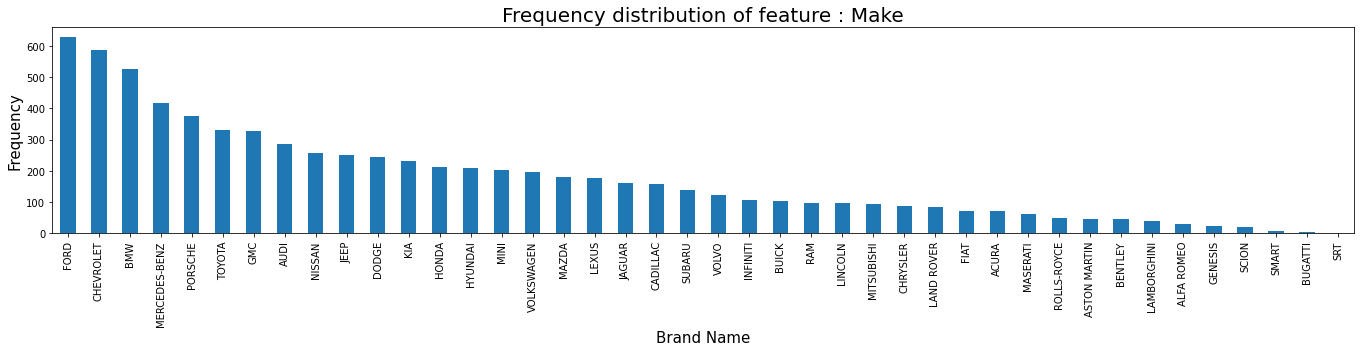

In [ ]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(fuel_con.Make.value_counts())))

plt.figure(figsize=(19,5));
fuel_con.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ***2. Feature : Model***
#### *Working with only the Top 20 model.*

Top 20 car models out of total 2053 car models
-------------  --
F-150 FFV 4X4  32
F-150 FFV      32
MUSTANG        27
FOCUS FFV      24
SONIC          20
F-150 4X4      20
SONIC 5        20
F-150          20
JETTA          19
COMPASS        19
ACCORD         19
ATS            19
TACOMA 4WD     19
CAMARO         18
COROLLA        18
FORTE 5        18
SILVERADO      18
SIERRA 4WD     18
SIERRA         18
SILVERADO 4WD  18
-------------  --


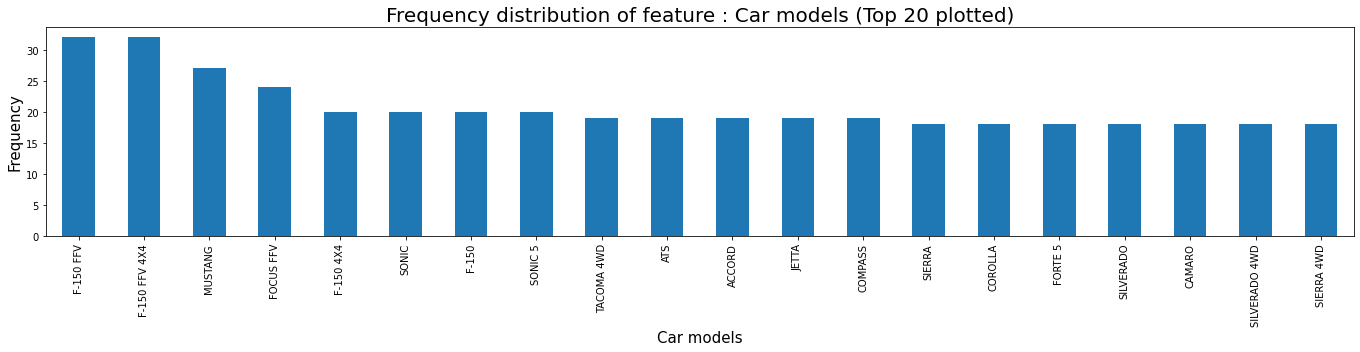

In [ ]:
print(f"Top 20 car models out of total {fuel_con.Model.nunique()} car models")
print(tabulate(pd.DataFrame(fuel_con.Model.value_counts().sort_values(ascending=False)[:20])))

plt.figure(figsize=(19,5));
fuel_con.groupby("Model")["Model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature : Car models (Top 20 plotted)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### ***3. Feature : Vehicle Class***

Vehicle Class
------------------------  ----
SUV - SMALL               1217
MID-SIZE                  1133
COMPACT                   1022
SUV - STANDARD             735
FULL-SIZE                  639
SUBCOMPACT                 606
PICKUP TRUCK - STANDARD    538
TWO-SEATER                 460
MINICOMPACT                326
STATION WAGON - SMALL      252
PICKUP TRUCK - SMALL       159
MINIVAN                     80
SPECIAL PURPOSE VEHICLE     77
VAN - PASSENGER             66
STATION WAGON - MID-SIZE    53
VAN - CARGO                 22
------------------------  ----


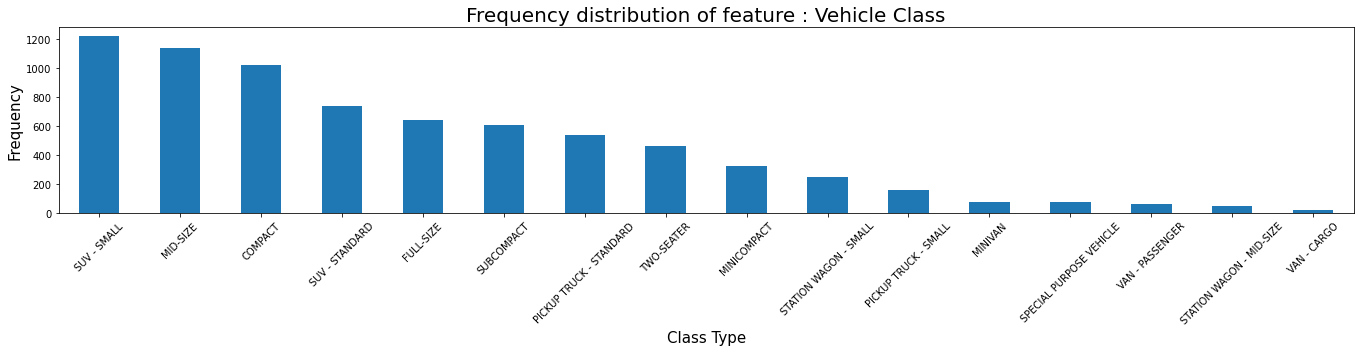

In [ ]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(fuel_con["Vehicle Class"].value_counts())))

plt.figure(figsize=(19,5));
fuel_con.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Class Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ***4. Feature : Transmission*** 

Transmission
---------------------------  ----
Automatic with Select Shift  3127
Automatic                    1851
Manual                       1185
Automated Manual              646
Continuously Variable         576
---------------------------  ----


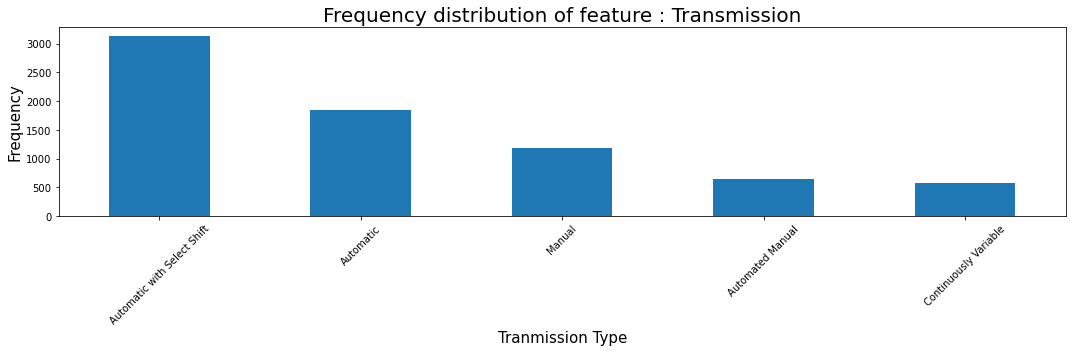

In [ ]:
print("Transmission")
print(tabulate(pd.DataFrame(fuel_con.Transmission.value_counts())))

plt.figure(figsize=(15,5));
fuel_con.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ***5. Feature : Fuel Type***

Fuel Type
----------------  ----
Regular Gasoline  3637
Premium Gasoline  3202
Ethanol(E85)       370
Diesel             175
Natural Gas          1
----------------  ----


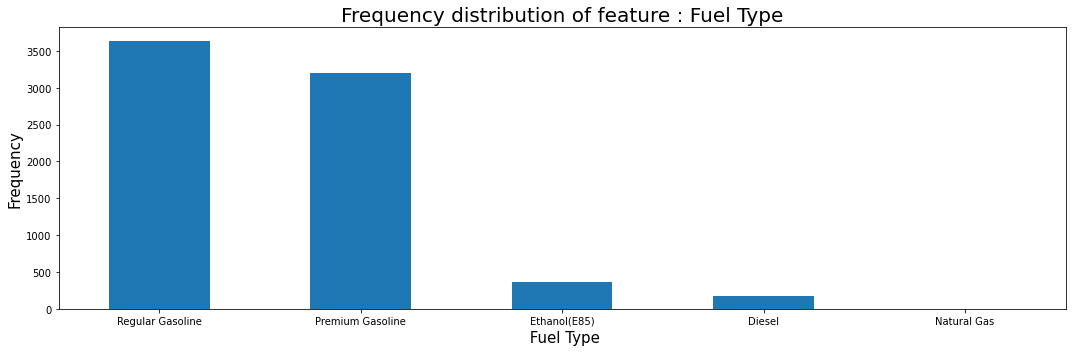

In [ ]:
print("Fuel Type")
print(tabulate(pd.DataFrame(fuel_con["Fuel Type"].value_counts())))

plt.figure(figsize=(15,5));
fuel_con.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar")

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 1. Out of the 42 car brands Ford(628) and Chevrolet(588) are the most dominating ones. Whereas cars of Smart(7), Bugati(3) and SRT(2) are the ones with lowest frequency.
#### 2. SUV-Small(1217) and MID-Size(1133) vehicles are the most frequent ones on Canadian roads.
#### 3. Frequency of car with Transmission type Automatic with Select Shift(3127) is the highest and with Continuously Variable Transmission(576) is the lowest.
#### 4. Car which runs on Gasoline let it be Regular(3637) or Premium(3202) is the most common vehicle type. And cars running on Diesel(175) are very low in frquency and there is only one sample which uses Natural Gases.

## ***Variation in CO2 emissions with different features***

#### ***1. Feature : Make***

Text(0, 0.5, 'CO2 Emissions(g/km)')

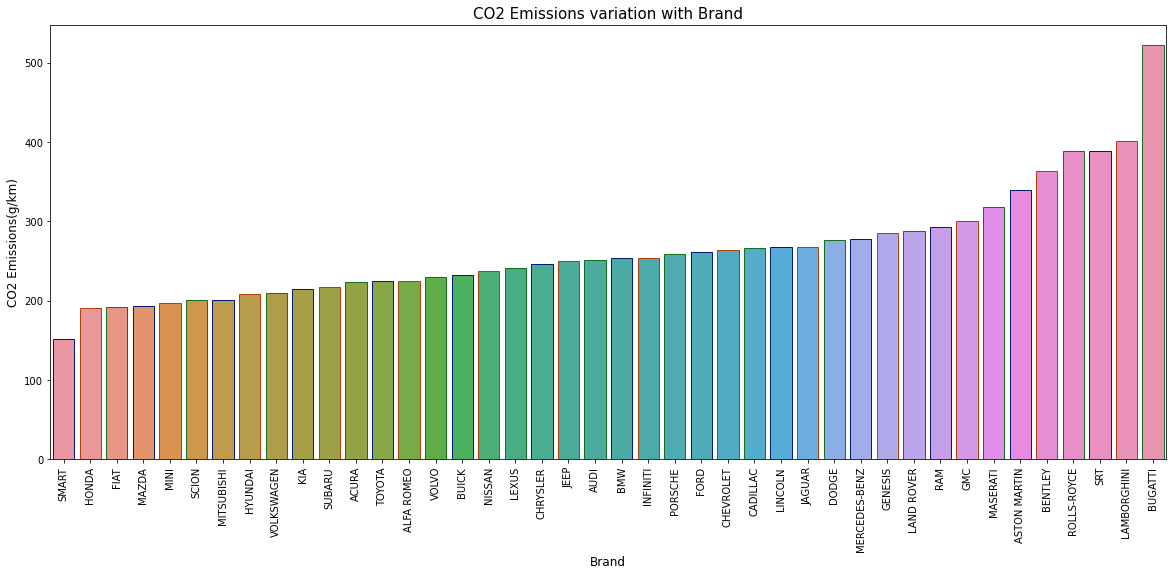

In [ ]:
CO2_make = fuel_con.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Make",y="CO2 Emissions(g/km)",data = CO2_make,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

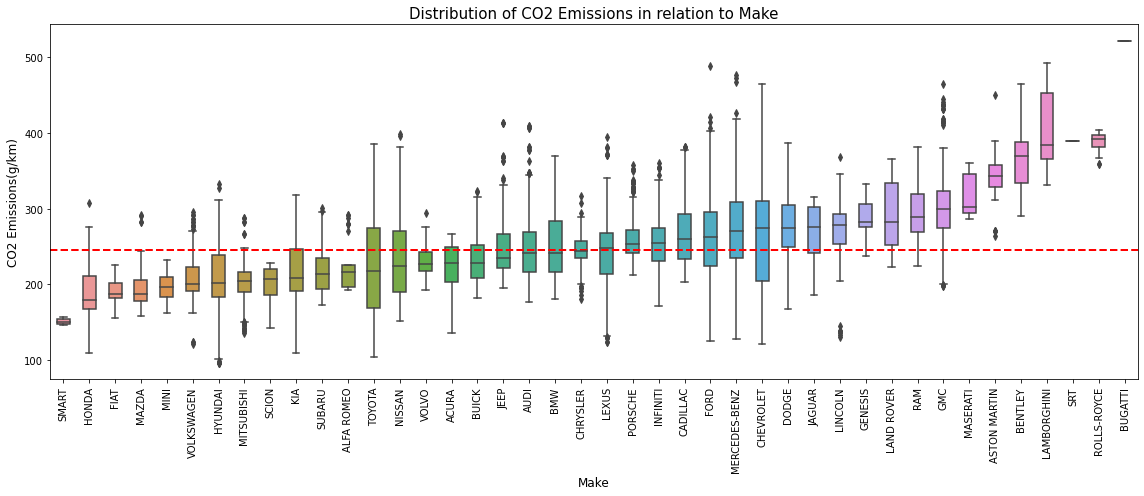

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the brand Bugatti is the highest and cars of SMART has the lowest emissions.
#### 2. The red line signify the sample mean of CO2 emissions.
#### 3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

#### ***2. Feature : Vehicle Class***

Text(0, 0.5, 'CO2 Emissions(g/km)')

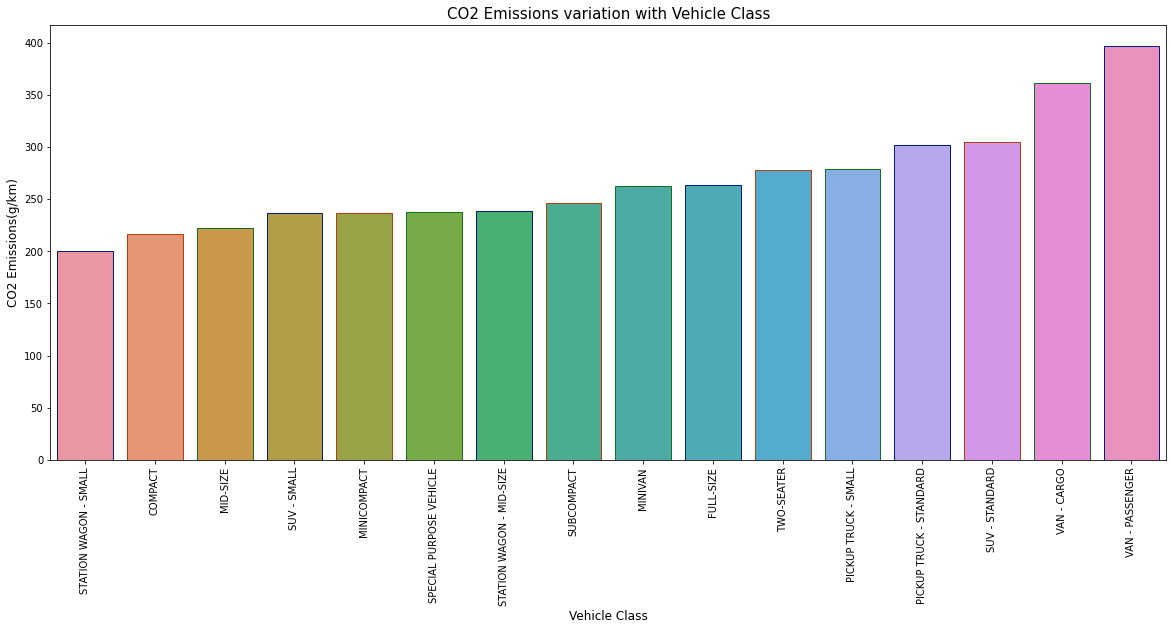

In [ ]:
CO2_class = fuel_con.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Vehicle Class",y="CO2 Emissions(g/km)",data = CO2_class,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Vehicle Class', fontsize=15)
plt.xlabel('Vehicle Class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

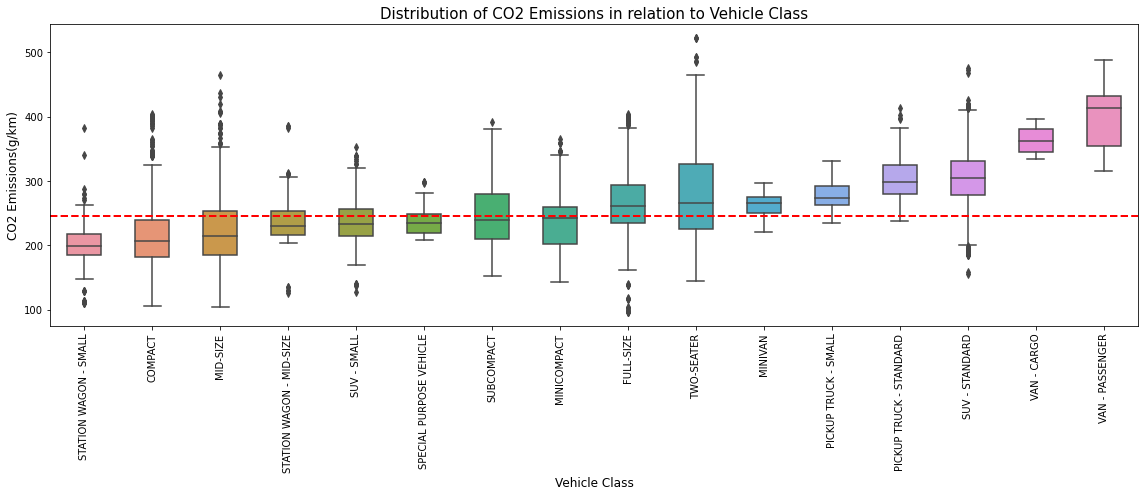

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 1. The vehicle of class VAN-Passenger followed by VAN-Cargo has the highest CO2 emissions among all. And Station Wagon-Small has the lowest CO2 emissions.
#### 2. There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.

#### ***3. Feature : Transmission***

Text(0, 0.5, 'CO2 Emissions(g/km)')

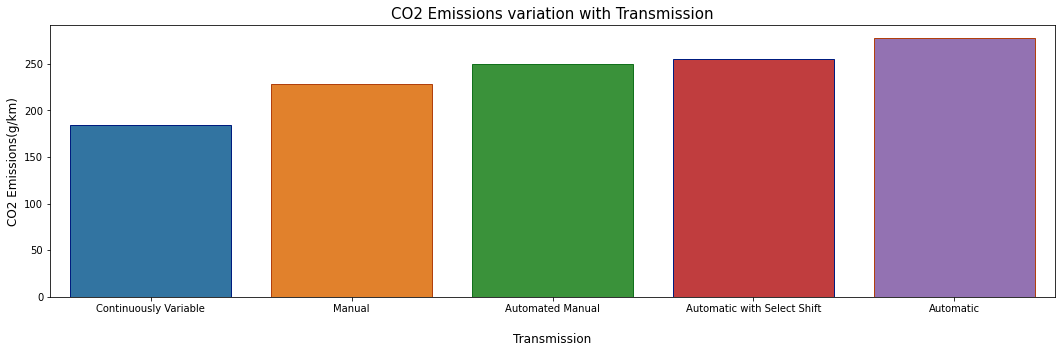

In [ ]:
CO2_transmission = fuel_con.groupby(["Transmission"])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(18,5))
sns.barplot(x = "Transmission",y="CO2 Emissions(g/km)", data = CO2_transmission,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('\nTransmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

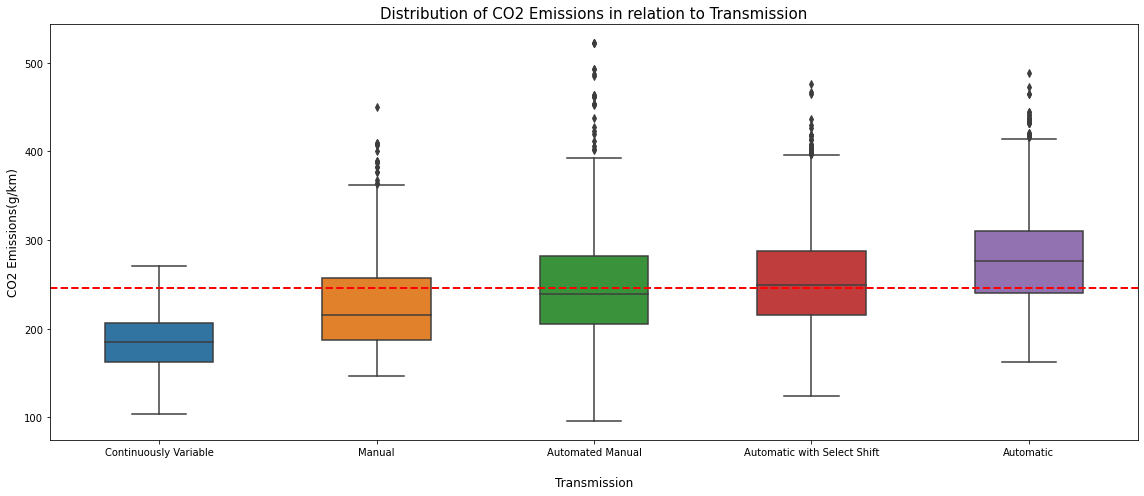

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Transmission", fontsize=15)
plt.xlabel("\nTransmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 1. Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.
#### 2. Median CO2 emissions of Automated Manual and Automatic with Select Shift vehicles is almost similar to that of sample median CO2 emissions.

#### ***4. Feature : Fuel Type***

Text(0, 0.5, 'CO2 Emissions(g/km)')

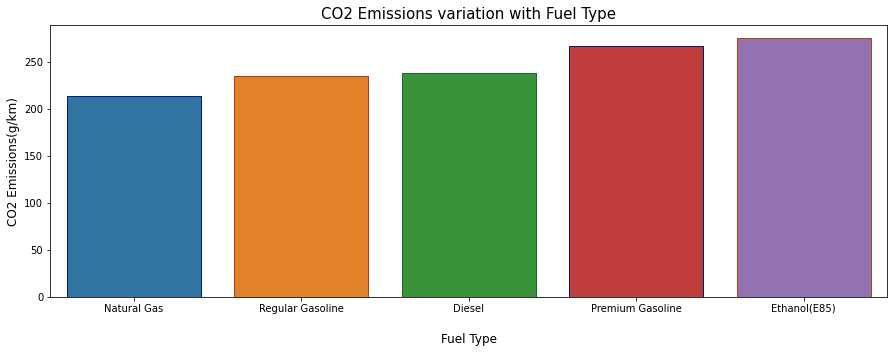

In [ ]:
CO2_fuel_type = fuel_con.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Fuel Type",y="CO2 Emissions(g/km)",data = CO2_fuel_type,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Fuel Type', fontsize=15)
plt.xlabel('\nFuel Type', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

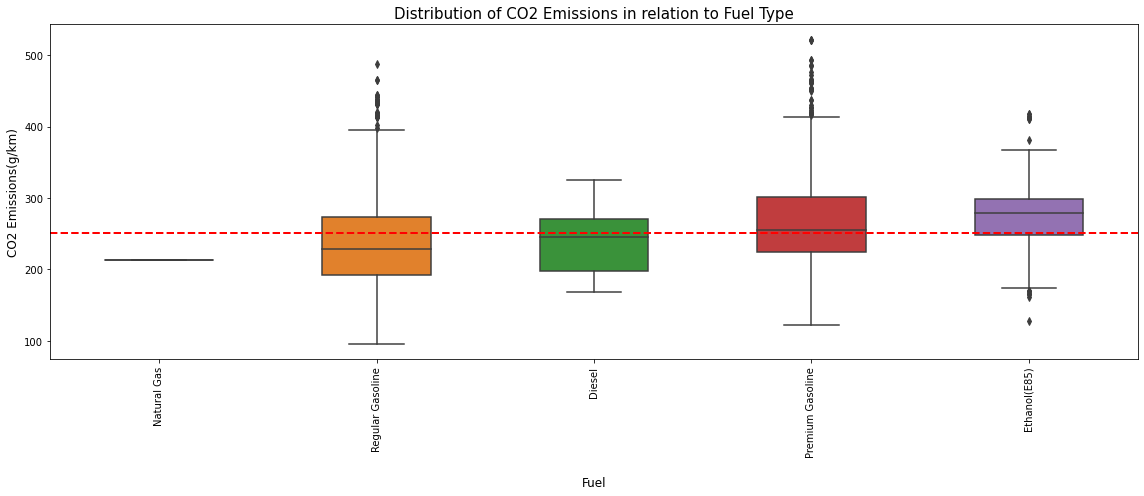

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#### 1. Cars running on Ethanol(E85) has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions.
#### 2. Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.
#### 3. The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

## ***Analysing the Numerical Values***

### ***Descriptive Statistics***

In [ ]:
stats_ = fuel_con.describe().T.drop(["count"], axis=1)
stats_ = pd.concat([stats_, fuel_con.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                                    mean     25%    median     75%    std    skew    min     max
--------------------------------  ------  ------  --------  ------  -----  ------  -----  ------
Engine Size(L)                      3.16    2.00      3.00    3.70   1.35    0.81   0.90    8.40
Cylinders                           5.62    4.00      6.00    6.00   1.83    1.11   3.00   16.00
Fuel Consumption City (L/100 km)   12.56   10.10     12.10   14.60   3.50    0.81   4.20   30.60
Fuel Consumption Hwy (L/100 km)     9.04    7.50      8.70   10.20   2.22    1.08   4.00   20.60
Fuel Consumption Comb (L/100 km)   10.98    8.90     10.60   12.60   2.89    0.89   4.10   26.10
Fuel Consumption Comb (mpg)        27.48   22.00     27.00   32.00   7.23    0.98  11.00   69.00
CO2 Emissions(g/km)               250.58  208.00    246.00  288.00  58.51    0.53  96.00  522.00


#### 1. The range of our target CO2 Emissions is between 96 and 522.
#### 2. Mean CO2 emissions is 250.58 and median is 246.
#### 3. 25% of the sample points has CO2 emissions within 208 and 75% has within 288.
#### 4. All the features are positively skewed.
#### 5. Cylinders and Fuel Consumption Hwy (L/100 km) seems significantly more skewed than the other features.
#### 6. CO2 Emissions(g/km) is the least skewed feature.
#### 7. Other than the regressor feature, among the predictors Engine Size(L) and Fuel Consumption City (L/100 km) are the least skewed features.

### ***To check the shape of the distribution and skewness of each feature***

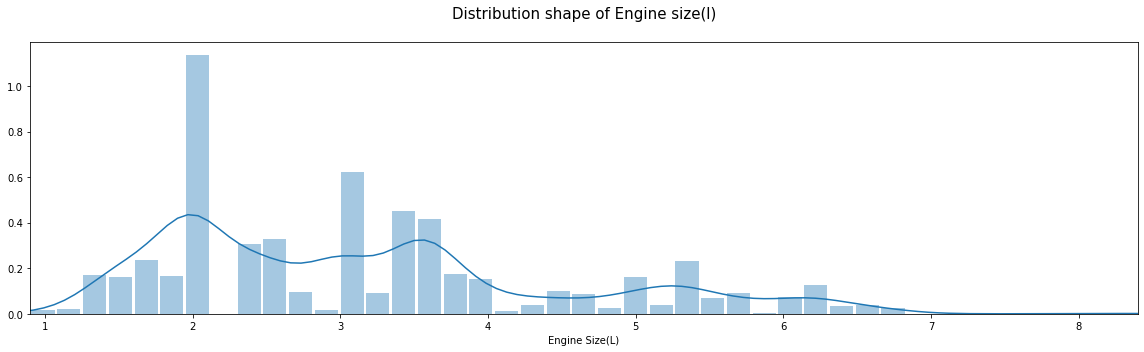

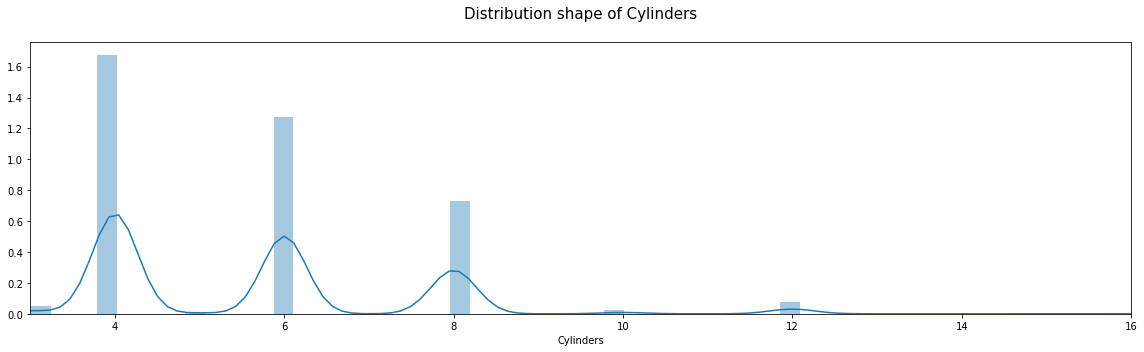

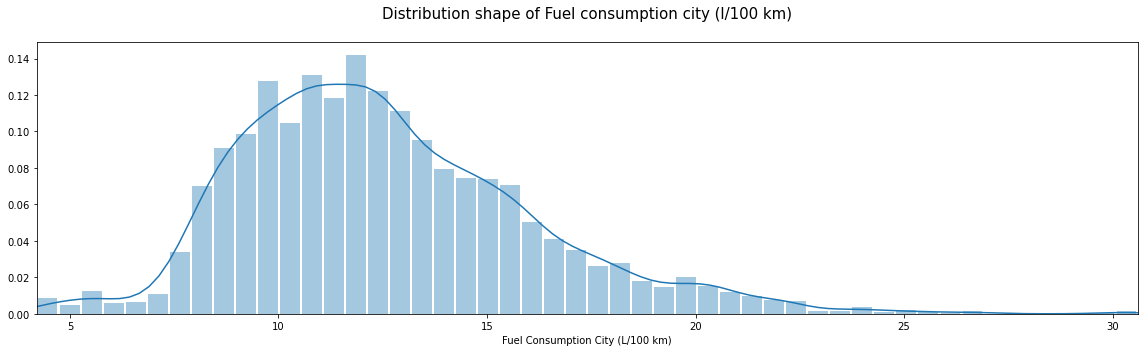

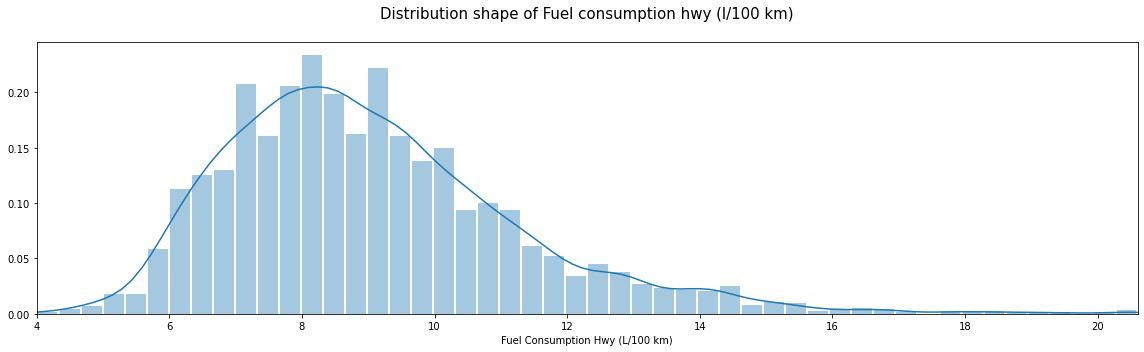

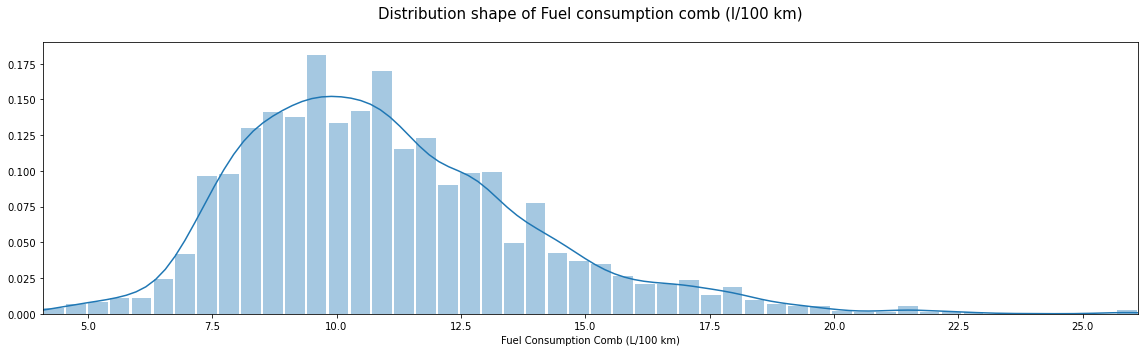

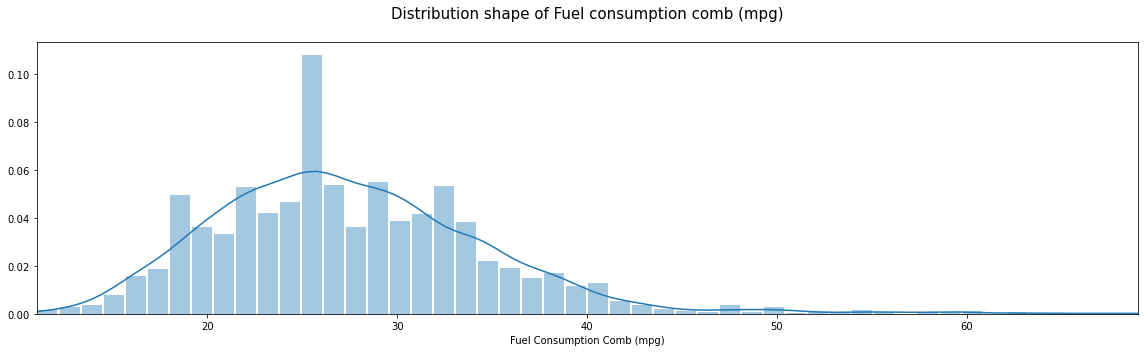

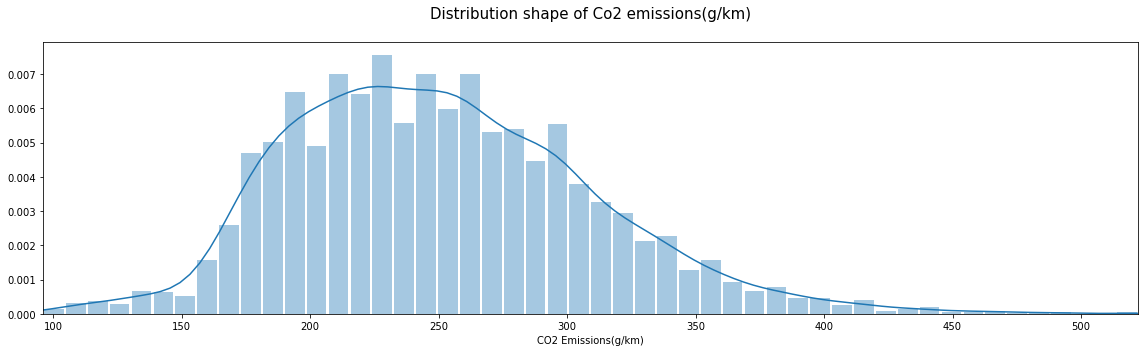

In [ ]:
for feature in fuel_con.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(fuel_con[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(fuel_con[feature].min(), fuel_con[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

## 1. Cylinder feature has discrete values so it is the most positively skewes distribution.
## 2. CO2 Emission in turn is the one which looks more similar to a normally distributed curve than the others.

### ***To visualize the distribution of the dependent varibale using a Frequency Distribution plot and a Box plot***

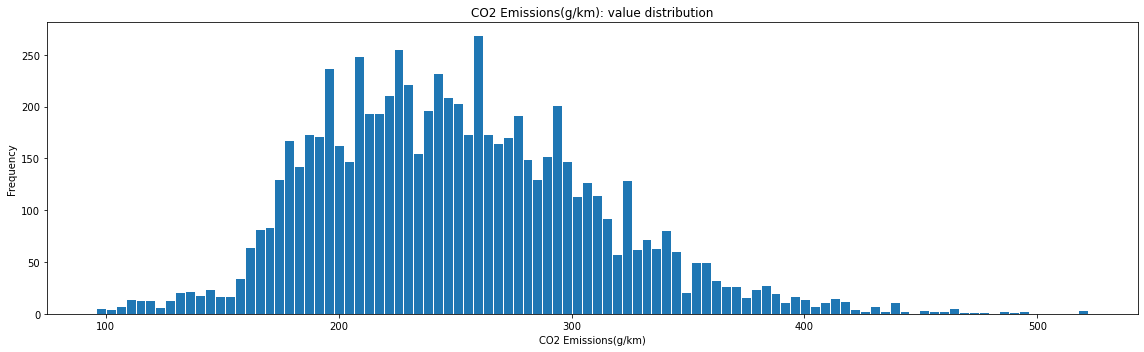

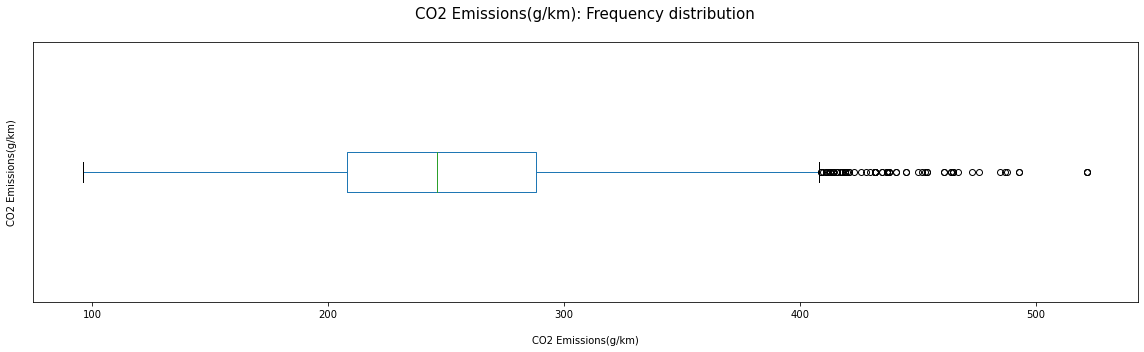

In [ ]:
plt.figure(figsize=(16,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions(g/km): value distribution")
plt.xlabel("CO2 Emissions(g/km)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
fuel_con["CO2 Emissions(g/km)"].plot(kind="box", vert=False)
plt.title("CO2 Emissions(g/km): Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions(g/km)")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions(g/km)\n", rotation=90)
plt.tight_layout()
plt.show()

## From the Box plot we can infer
## 1. The minimum vale of the CO2 emission is around 96.
## 2. The median CO2 emission is 246.
## 3. The 25% of the samples have CO2 emission between 96 and 208.
## 4. The 75% of the samples have CO2 emission between 96 and 288.
## 5. There are no outliers in the lower half but there are outliers in the upper half.
## 6. The maximum CO2 emissions observed is 522 which is an outlier.
## 7. The distribution of CO2 emissions is positively skewed.

## ***CORRELATION MATRIX***

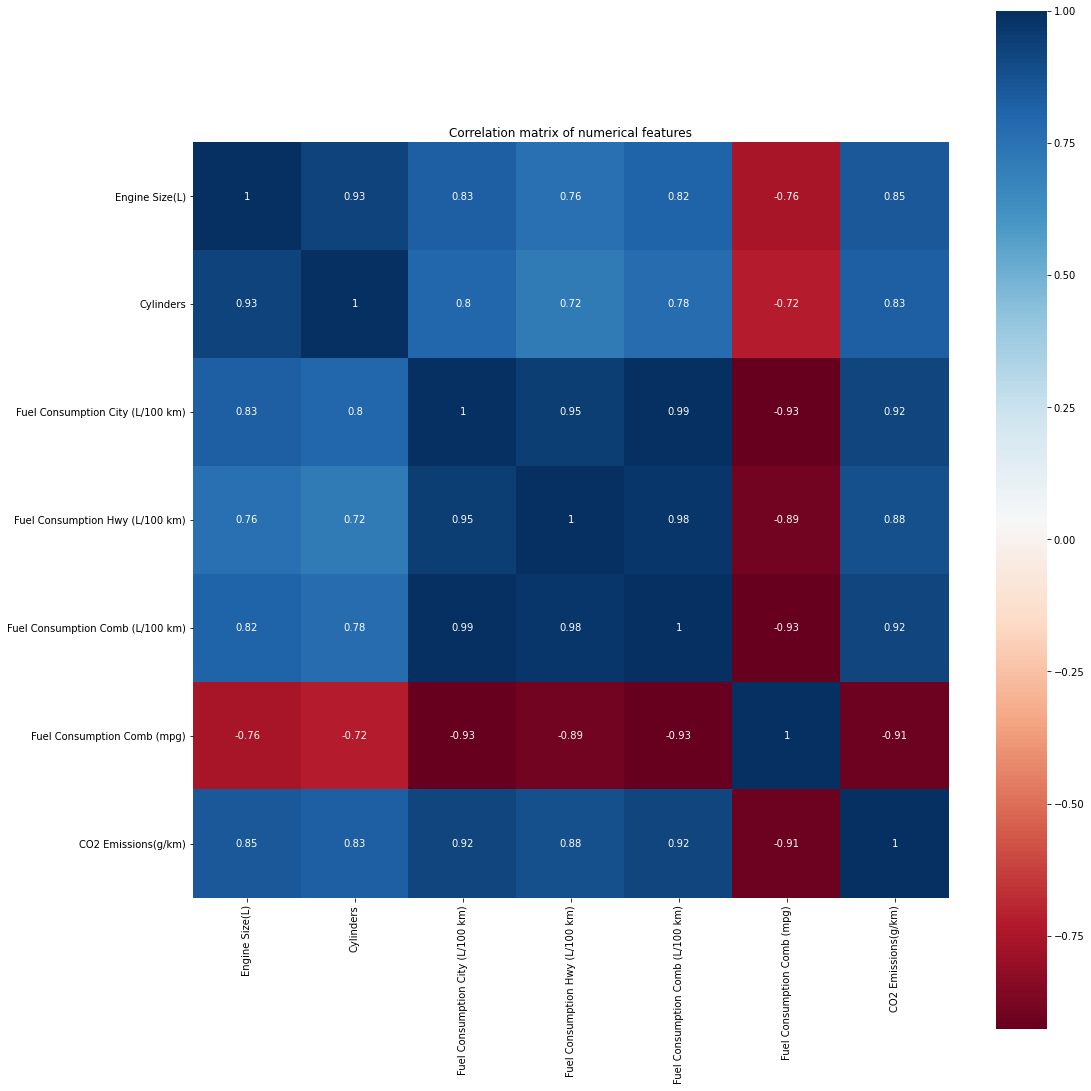

In [ ]:
corr = fuel_con.corr()
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

## 1. Fuel Consumption Comb (mpg) is negatively correlated to all the features.
## 2. All the other features are postively correlated with each other.
## 3. Both Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have very strong positive correlation of 0.99 and 0.98 with Fuel Consumption Comb (L/100 km), since Fuel Consumption Comb (L/100 km) is redundant.
## 4. Our dependent variable CO2 Emissions(g/km) has highest positive correlation of 0.92 with Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) and strong negative correlation of -0.91 with Fuel Consumption Comb (mpg). 

### ***Correlation of independent features with dependent variable***

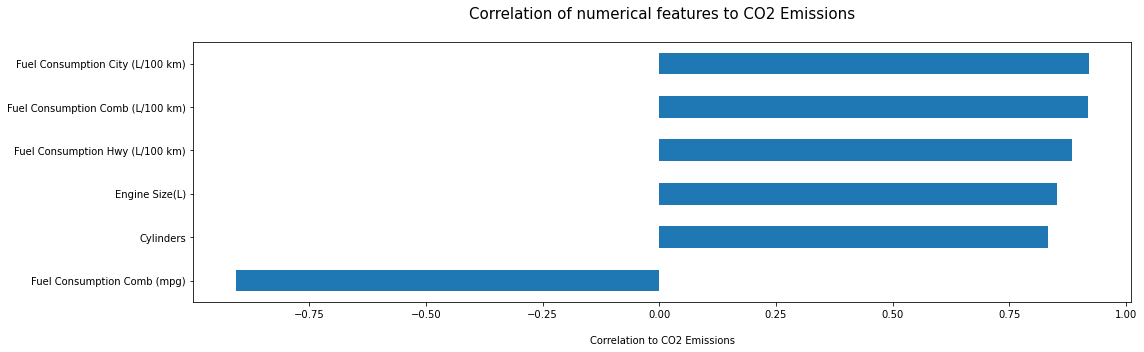

In [ ]:
plt.figure(figsize=(16,5))
corr["CO2 Emissions(g/km)"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to CO2 Emissions\n", fontsize=15)
plt.xlabel("\nCorrelation to CO2 Emissions")
plt.tight_layout()
plt.show()

## ***Variation in CO2 emissions with different features***

#### ***1. Feature : Cylinders***

Text(0, 0.5, 'CO2 Emissions(g/km)')

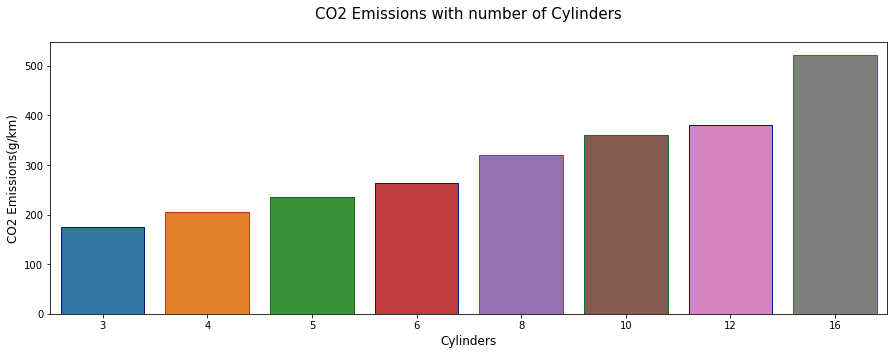

In [ ]:
CO2_cylinder = fuel_con.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

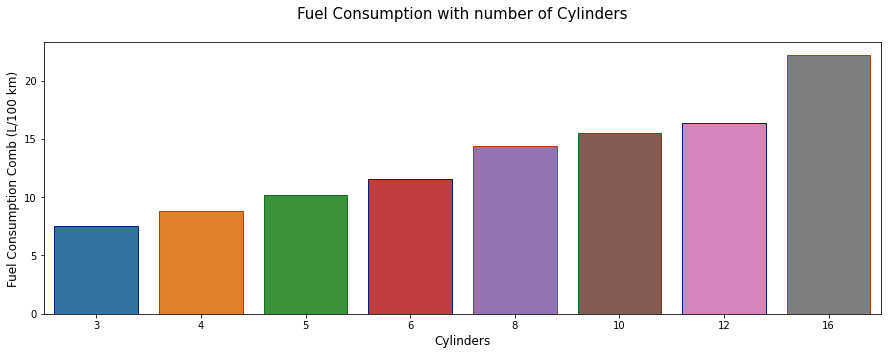

In [ ]:
fuel_cylinder = fuel_con.groupby(['Cylinders'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="Fuel Consumption Comb (L/100 km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

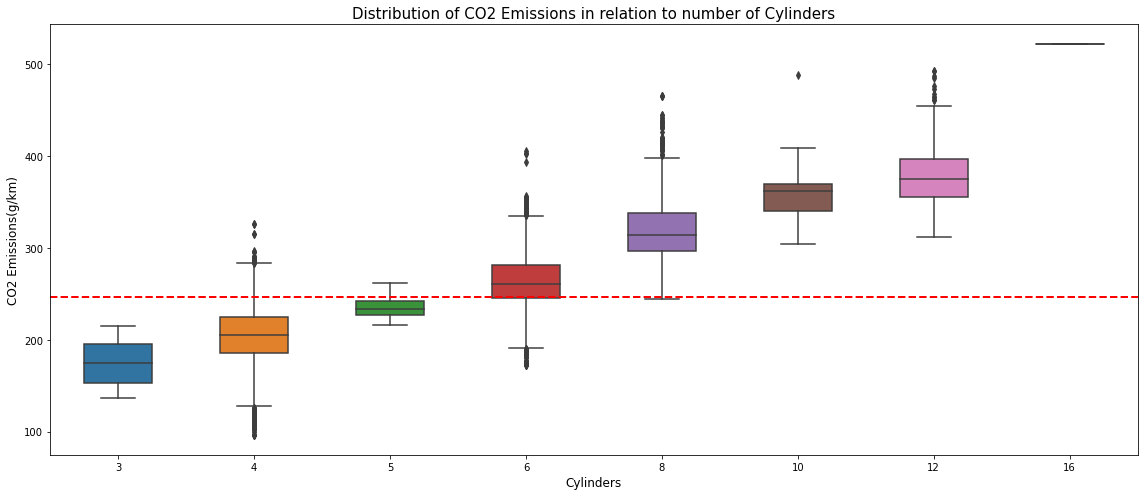

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

## 1. With increase in number of Cylinders, CO2 emissions also increase proportionally.
## 2. The same trend can be observed for Cylinder vs Combined Fuel Consumption. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so with increase in number of cylinders, CO2 emissions also increases.
## 3. Vehicles with number of cylinders more than 5 has a median CO2 emissions greater than the sample median CO2 emissions.
## 4. Vehicles with less than 6 cylinder have almost all the sample with median CO2 emissions less than sample median.
## 5. Whereas vehicles with more than 5 cylinders have almost 100% sample with median CO2 emissions more than the sample median.

#### ***2. Feature : Engine Size(L)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

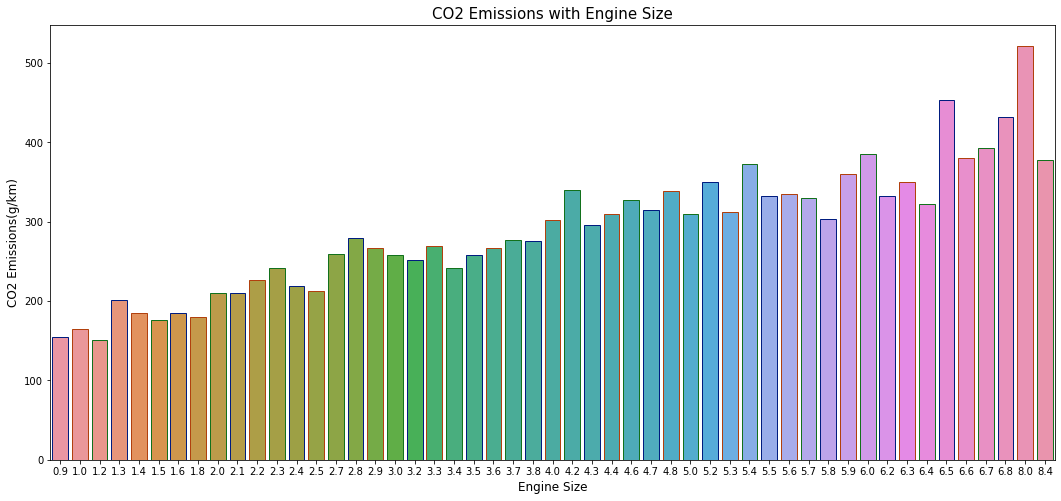

In [ ]:
CO2_engine = fuel_con.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

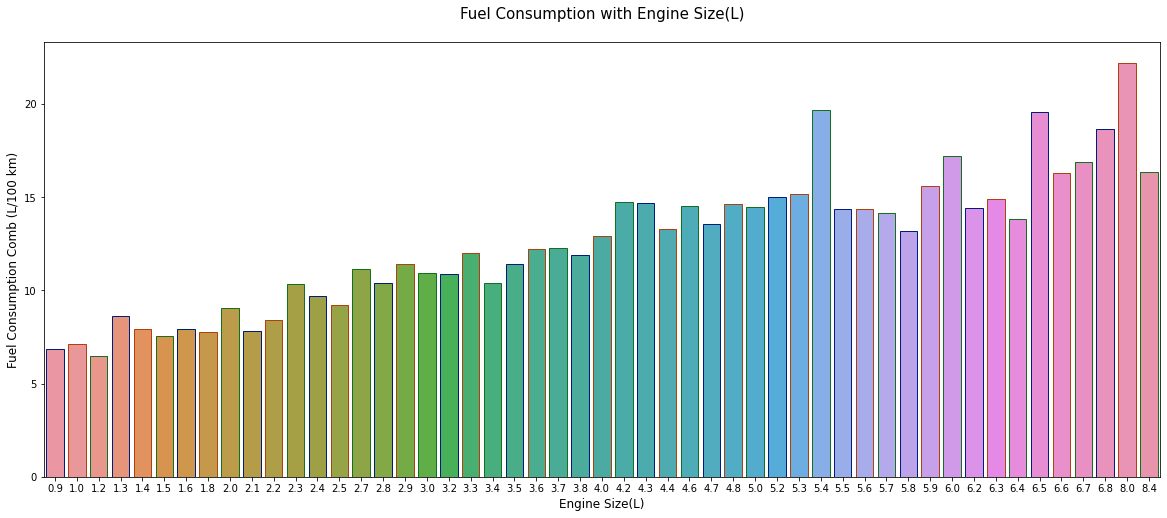

In [ ]:
fuel_engine = fuel_con.groupby(['Engine Size(L)'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Engine Size(L)",y="Fuel Consumption Comb (L/100 km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

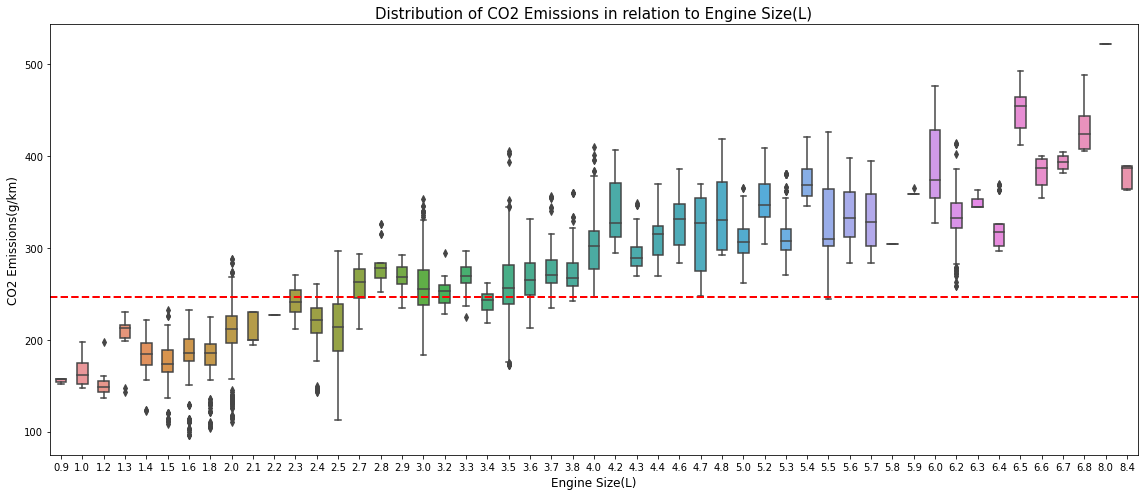

In [ ]:
plt.figure(figsize=(16,7))
order = fuel_con.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=fuel_con, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(fuel_con["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

## 1. With increase in Engine Size, CO2 emissions also increases.
## 2. The same trend can be observed for Engine Size vs Combined Fuel Consumption also. And since Combined Fuel Consumption is strongly postively correlated with CO2 emissions, so as Engine Size increases CO2 emissions also increases.
## 3. Vehicles with Engines Size more than 2.5L has a median CO2 emissions greater than or equal to the sample median CO2 emissions.

#### ***3. Feature : Fuel Consumption City (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

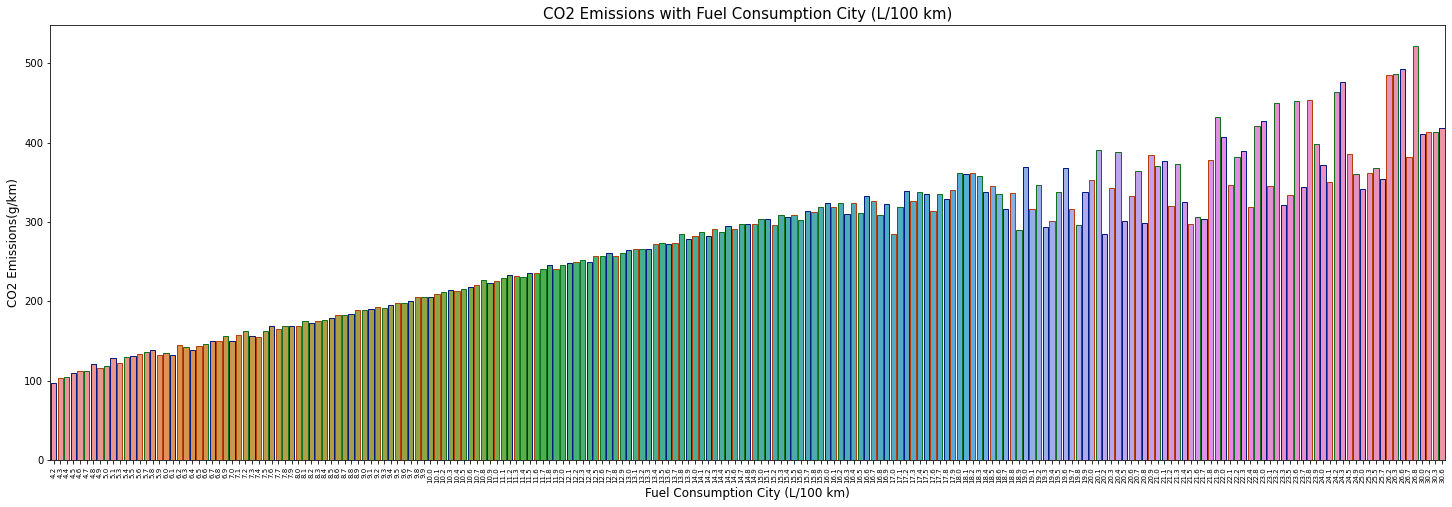

In [ ]:
CO2_city = fuel_con.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

#### ***4. Feature : Fuel Consumption Hwy (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

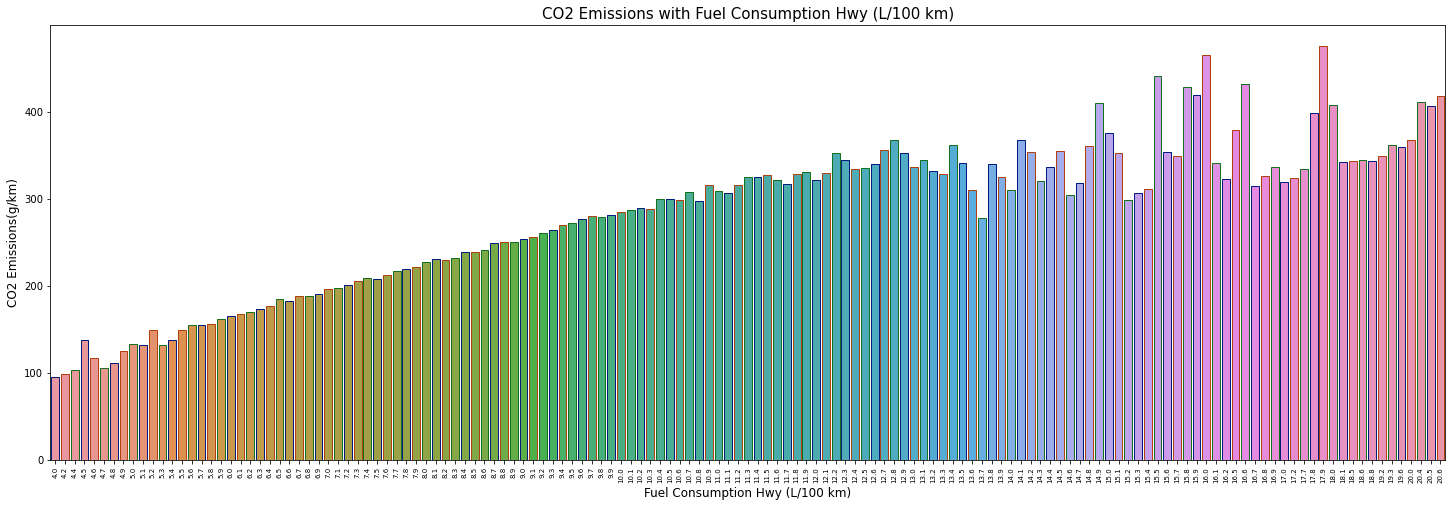

In [ ]:
CO2_hwy = fuel_con.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

#### ***5. Feature : Fuel Consumption Comb (L/100 km)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

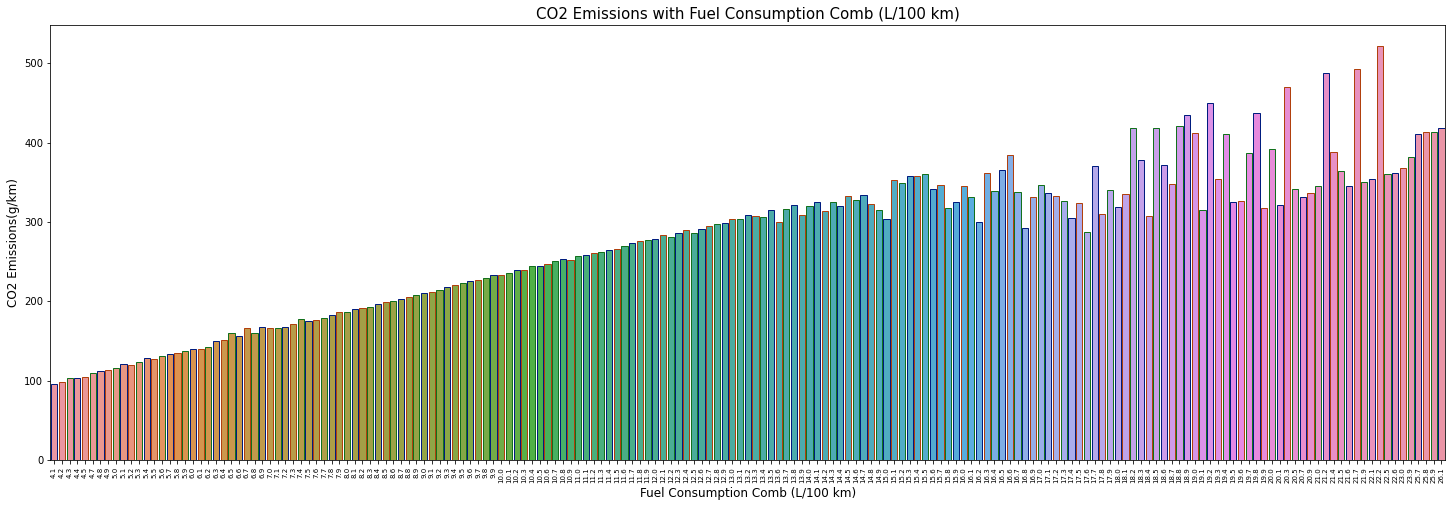

In [ ]:
CO2_comb = fuel_con.groupby(['Fuel Consumption Comb (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

## 1. With the increase in fuel consumption the CO2 emissions also increases.
## 2. From the plots we can see almost an linear increase in CO2 emissions with Fuel Consumption, as they are highly postively correlated.
## 3. The same trend can be observed in all the three features representing Fuel Consumption in (L/100 km).

#### ***6. Feature : Fuel Consumption Comb (mpg)***

Text(0, 0.5, 'CO2 Emissions(g/km)')

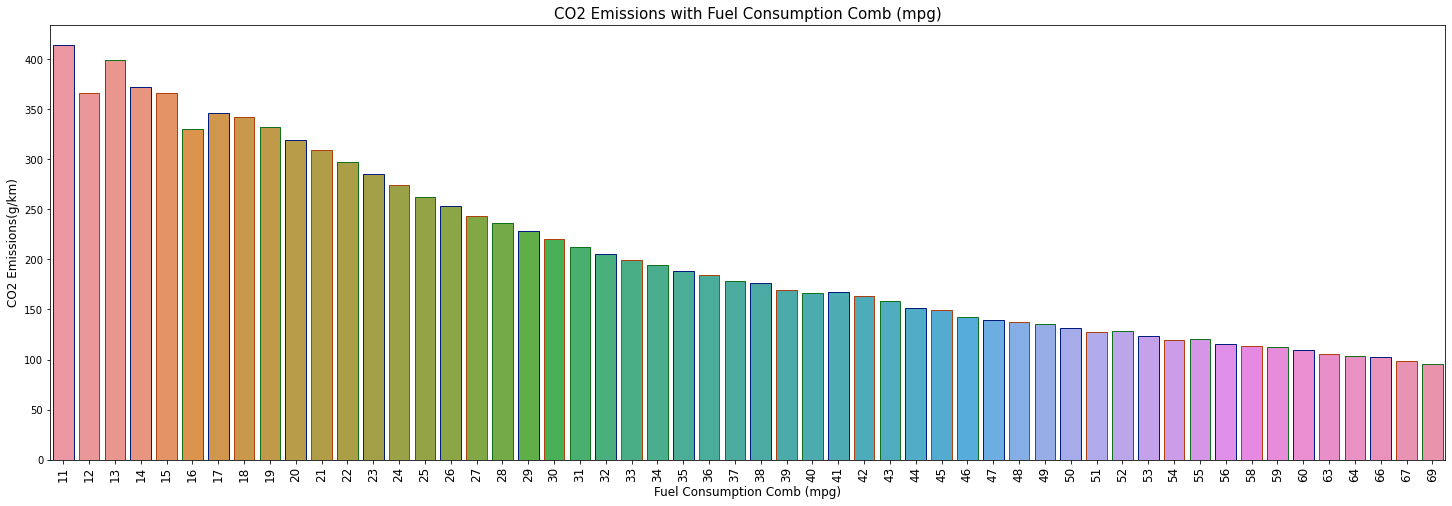

In [ ]:
CO2_comb_mpg = fuel_con.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

## 1. As infered from the correlation matrix that CO2 Emission and Fuel Consumption Comb(mpg) are strongly negatively correlated. 
## 2. The feature Fuel Consumption Comb(mpg) shows how many miles a car can go with one gallon of fuel. So less mile per gallon represents more fuel consumption. So it is logical to have negative correlation with CO2 emissions.
## 3. So as Fuel Consumption Comb(mpg) decreases, CO2 emissios increases.